# Introduction
- This notebook uses the [Wine Quality Dataset](https://archive.ics.uci.edu/dataset/186/wine+quality) from the UCI Machine Learning Repository, and is related to red and white variants of the Portuguese "Vinho Verde" wine;
- This dataset has the following features:

**Input variables (based on physicochemical tests)**:
   1) fixed acidity
   2) volatile acidity
   3) citric acid
   4) residual sugar
   5) chlorides
   6) free sulfur dioxide
   7) total sulfur dioxide
   8) density
   9) pH
   10) sulphates
   11) alcohol
   
**Output variable (based on sensory data)**: 

   12) quality (score between 0 and 10)

- We'll begin by importing the dataset and analysing it's features.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
from ucimlrepo import fetch_ucirepo 
  
wine_quality = fetch_ucirepo(id=186)

In [5]:
X = wine_quality.data.features 
y = wine_quality.data.targets

original = wine_quality.data.original

- We have three main datasets to work with:
  - Features: Continuous values for different measurements;
  - Targets: The score that was given for the wine;
  - Original: The original dataset with both 'quality' and 'color' columns.

# Exploratory Data Analysis
- We'll begin by analysing the different features of the dataset.

In [8]:
original.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red


In [9]:
X.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8


In [10]:
X.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


- There are no null values on X, which makes preprocessing easier.

In [13]:
y.head(2)

,quality
0,5
1,5


In [14]:
y['quality'].value_counts().sort_index()

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64

- Only notes from 3 to 9 were given.

## Distributions

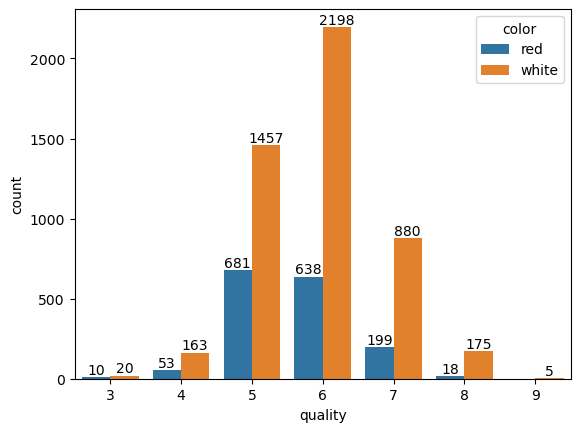

In [17]:
plot = sns.countplot(original, x='quality', hue='color')

for container in plot.containers:
    plot.bar_label(container)

- Distributions between qualities aren't balanced, this will probably make the models perform worse;
- They look, however, normalized, which makes sense for ratings.

## Correlations

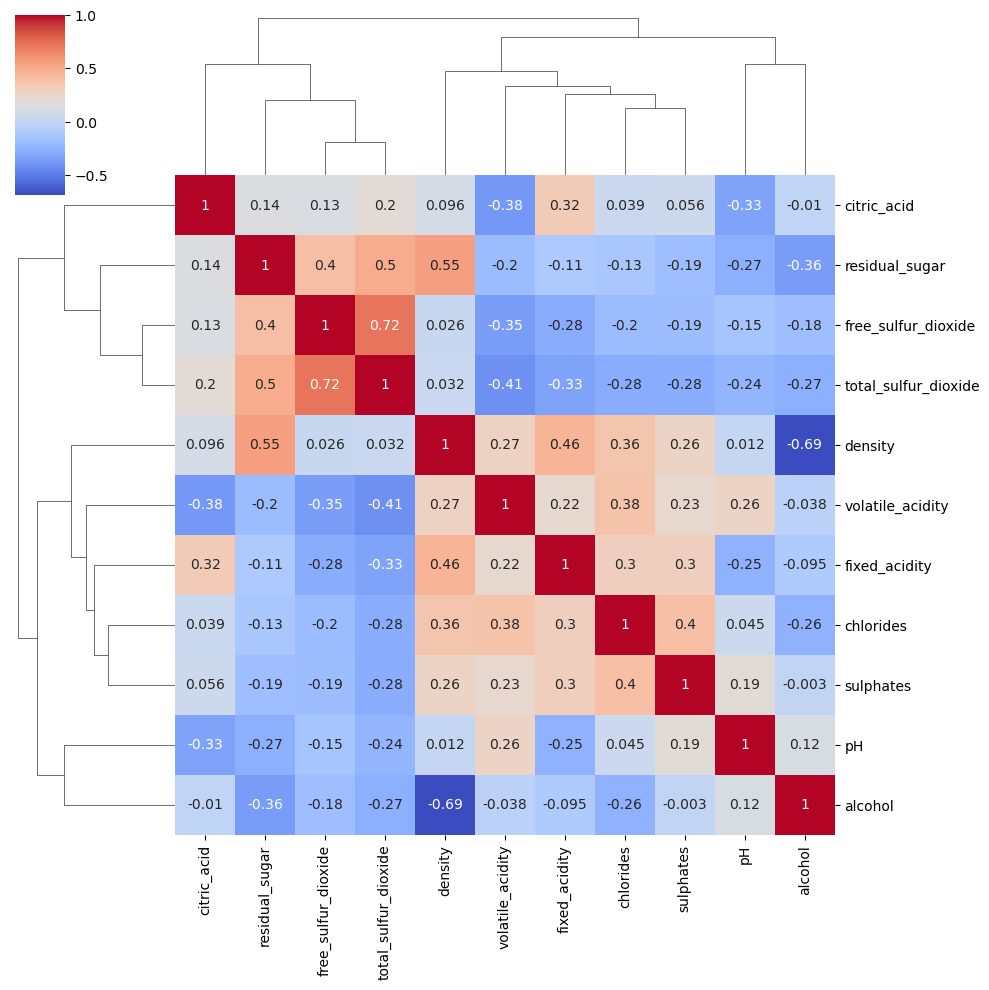

In [20]:
sns.clustermap(X.corr(), annot=True, cmap='coolwarm')

- Managed to find some clusters between residual_sugar, free_sulfur_dioxide and total_sulfur_dioxide.

## Comparisons of Different Qualities

In [23]:
groupby = original.groupby(['quality', 'color'])

meanqualityred = groupby.mean().xs('red', level='color').reset_index()
maxqualityred = groupby.max().xs('red', level='color').reset_index()
minqualityred = groupby.min().xs('red', level='color').reset_index()

meanqualitywhite = groupby.mean().xs('white', level='color').reset_index()
maxqualitywhite = groupby.max().xs('white', level='color').reset_index()
minqualitywhite = groupby.min().xs('white', level='color').reset_index()

In [24]:
maxqualityred

,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,3,11.6,1.580,0.66,5.7,0.267,34.0,49.0,1.00080,3.63,0.86,11.0
1,4,12.5,1.130,1.00,12.9,0.610,41.0,119.0,1.00100,3.90,2.00,13.1
2,5,15.9,1.330,0.79,15.5,0.611,68.0,155.0,1.00315,3.74,1.98,14.9
3,6,14.3,1.040,0.78,15.4,0.415,72.0,165.0,1.00369,4.01,1.95,14.0
4,7,15.6,0.915,0.76,8.9,0.358,54.0,289.0,1.00320,3.78,1.36,14.0
5,8,12.6,0.850,0.72,6.4,0.086,42.0,88.0,0.99880,3.72,1.10,14.0


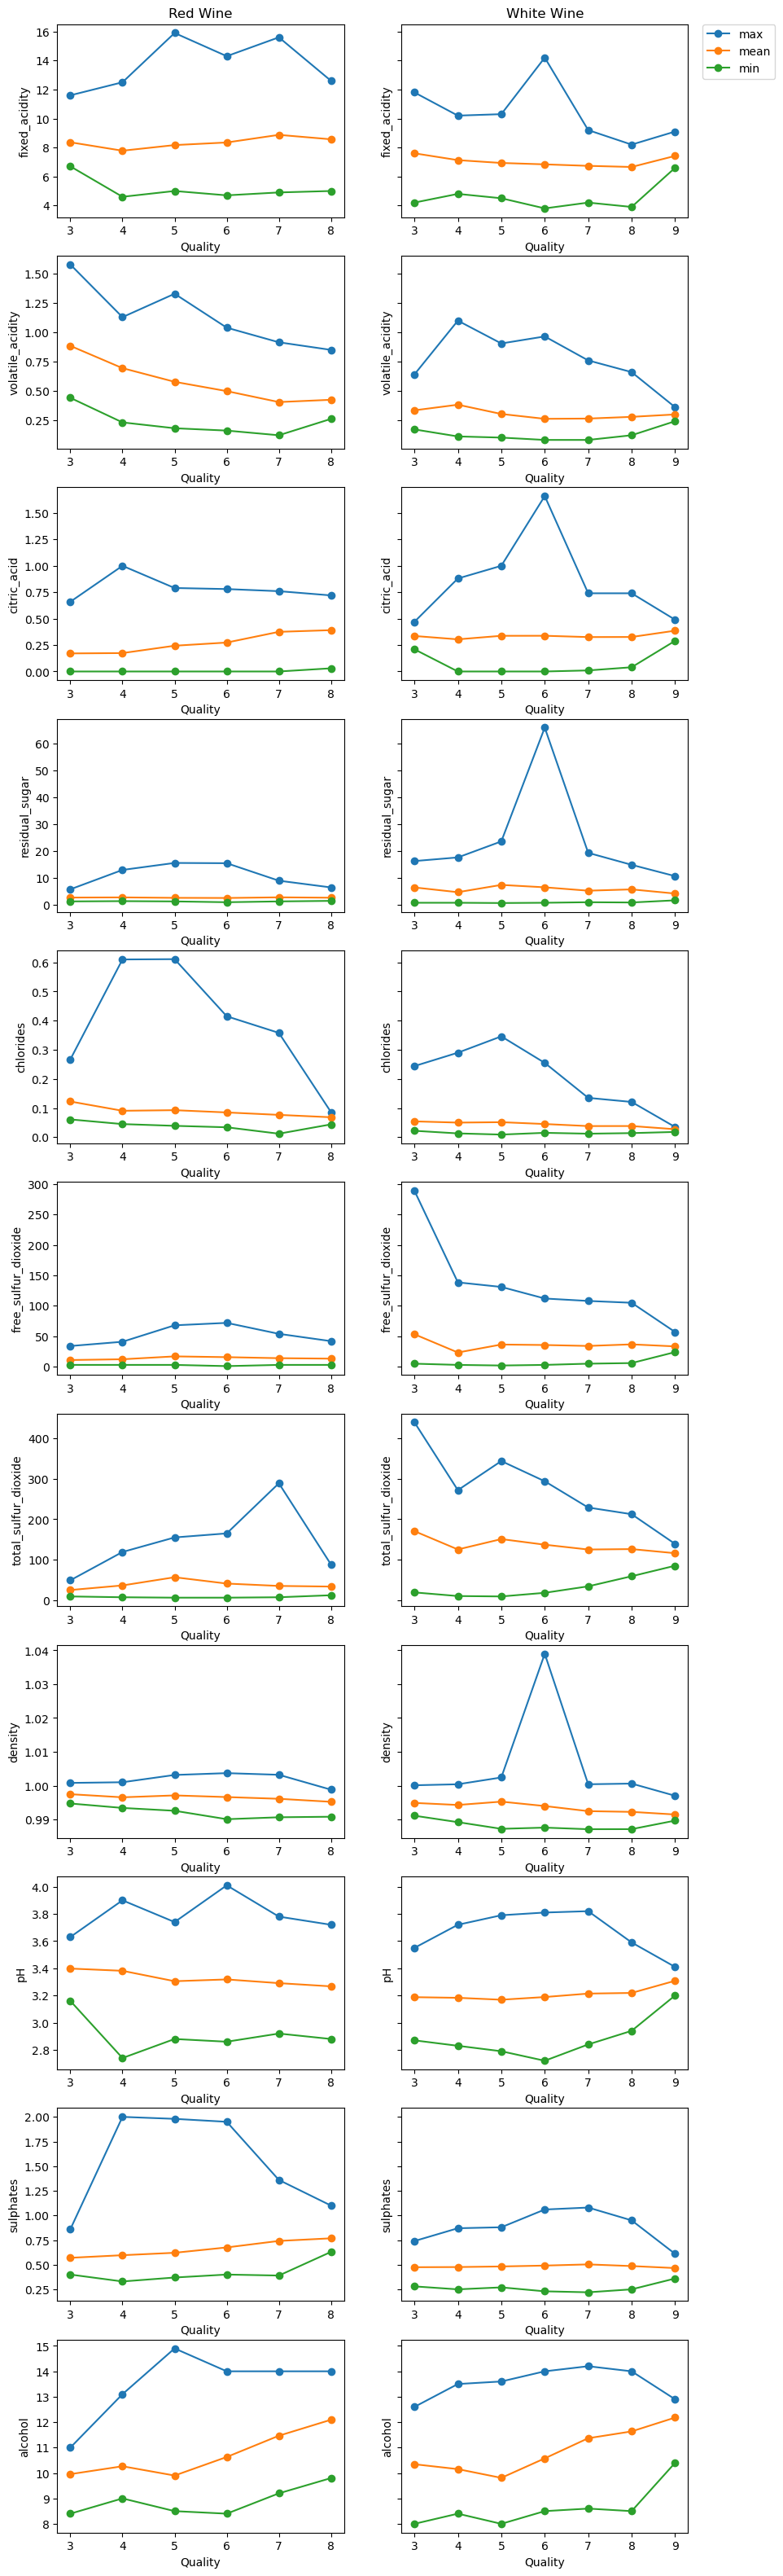

In [25]:
fig,axes = plt.subplots(nrows = len(X.columns), ncols = 2, figsize=(10,40), sharey='row')

for idx, ax in enumerate(axes):
    ax[0].plot(maxqualityred['quality'], maxqualityred[X.columns[idx]], marker='o', label='max')
    ax[0].plot(meanqualityred['quality'], meanqualityred[X.columns[idx]], marker='o', label='mean')
    ax[0].plot(minqualityred['quality'], minqualityred[X.columns[idx]], marker='o', label='min')
    ax[0].set_xlabel('Quality')
    ax[0].set_ylabel(X.columns[idx])

    ax[1].plot(maxqualitywhite['quality'], maxqualitywhite[X.columns[idx]], marker='o', label='max')
    ax[1].plot(meanqualitywhite['quality'], meanqualitywhite[X.columns[idx]], marker='o', label='mean')
    ax[1].plot(minqualitywhite['quality'], minqualitywhite[X.columns[idx]], marker='o', label='min')
    ax[1].set_xlabel('Quality')
    ax[1].set_ylabel(X.columns[idx])

axes[0][0].set_title('Red Wine')
axes[0][1].set_title('White Wine')
axes[0][1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

- For white wines, density, residual sugar, citric acid and fixed acidity have peaks on quality 6. This probably means higher qualities (7, 8 and 9) have a cutoff for these characteristics. We can check that:

In [27]:
originalwhite = original.groupby(['color', 'quality']).max().xs(key='white', level='color')
originalwhitepct = originalwhite[['density', 'residual_sugar', 'citric_acid', 'fixed_acidity']].pct_change()
originalwhitepct.idxmin()

density           7
residual_sugar    7
citric_acid       7
fixed_acidity     7
dtype: int64

Text(0.5, 1.0, 'Percentual Changes for Maximum Values')

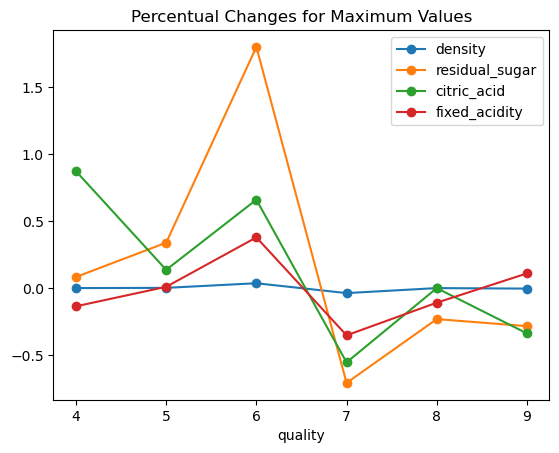

In [28]:
originalwhitepct.plot(marker='o')
plt.title('Percentual Changes for Maximum Values')

- Here we can see that on point 7 has the minimal values for every percentual change. This can mean that having a high value for these characteristics avoid white wines of being graded higher scores.

# Predicting Quality

We will try to predict the quality of a wine using two methods:
- Treating quality as a numeric value;
- Treating quality as a class.

In both cases, we'll first preprocess the data.

### Preprocessing
- We'll first Standardize the data.

In [33]:
X = wine_quality.data.features 
y = wine_quality.data.targets

X.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8


In [34]:
y.head(2)

,quality
0,5
1,5


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns)
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464


- We'll also insert the color column as a Boolean for possibly enhancing the performance.

In [37]:
X['color'] = original['color']

X = pd.get_dummies(X, drop_first=True, columns=['color'])

In [38]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color_white
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,False
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,False
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,False
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,False
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,False


- Then we can do a Train-Test split.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y['quality'], test_size=0.3, random_state=101)

## Quality as a Numeric Value
- We'll predict the quality using Linear Regression.

### Linear Regression

- First, let's fit a model to the data.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [45]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

- Now, let's evaluate the fitted model.

In [47]:
predictions = lm.predict(X_test)

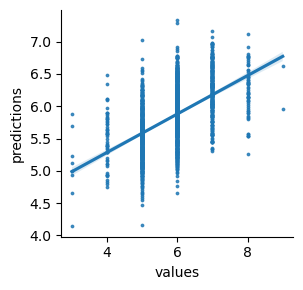

In [48]:
sns.lmplot(pd.DataFrame({'values': list(y_test), 'predictions': predictions}), x='values', y='predictions', height=3, scatter_kws={'s':3})

- The predictions and values seem to follow a straight line with little error, which indicates a good fit.

Text(0.5, 9.444444444444459, 'Residuals')

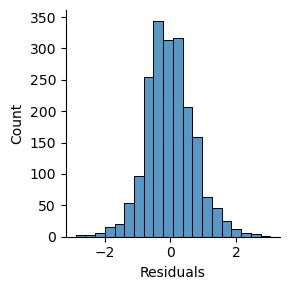

In [50]:
sns.displot((y_test - predictions), height=3, bins=20)
plt.xlabel('Residuals')

- The residuals are normalized around 0, which can also indicate a good fit.

In [52]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.7280680867010122

- The mean squared value means that the model has an error of approximately 0.73. 

In [54]:
metrics.explained_variance_score(y_test, predictions)

0.28938945433578445

- We got a R-Squared of around 0.28, which means the model doesn't explain the Variance of data all too well.

### SVR
- Next, we'll try a Suport Vector Regressor.

In [57]:
from sklearn.svm import SVR

In [58]:
regr = SVR()

In [59]:
regr.fit(X_train, y_train)

SVR()

In [60]:
predictions = regr.predict(X_test)

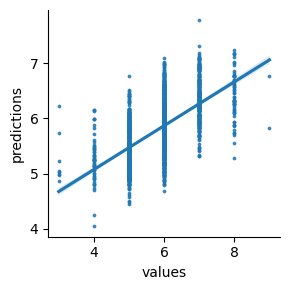

In [61]:
sns.lmplot(pd.DataFrame({'values': list(y_test), 'predictions': predictions}), x='values', y='predictions', height=3, scatter_kws={'s':3})

- Similarly to Linear Regression, we get a linear fit.

Text(0.5, 9.444444444444459, 'Residuals')

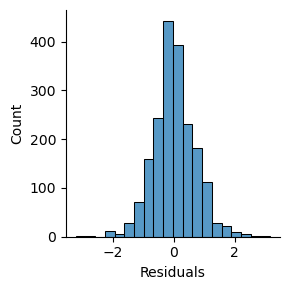

In [63]:
sns.displot((y_test - predictions), height=3, bins=20)
plt.xlabel('Residuals')

- Also similar to Linear Regression, the residuals are normally distributed around 0, which indicate a good fit.

In [65]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.6843589755698153

- We got a slightly smaller value for error, around 0.67.

In [67]:
metrics.explained_variance_score(y_test, predictions)

0.37271101345522606

- And a higher R-Squared of around 0.39.

## Quality as a Category

We'll try several approaches:
- Linear SVC;
- K-Nearest Neighbors;
- SVC With a RBF Kernel;
- Multiclass Logistic Regression.

### Linear SVC
- We'll first try a Support Vector Classifier with a Linear Kernel.

In [71]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC()

In [73]:
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions, zero_division=0))

[[  0   0   6   2   0   0   0]
 [  0   0  33  23   0   0   0]
 [  0   0 392 258   0   0   0]
 [  0   0 207 651  11   0   0]
 [  0   0  21 267  14   0   0]
 [  0   0   3  57   3   0   0]
 [  0   0   0   1   1   0   0]]


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        56
           5       0.59      0.60      0.60       650
           6       0.52      0.75      0.61       869
           7       0.48      0.05      0.08       302
           8       0.00      0.00      0.00        63
           9       0.00      0.00      0.00         2

    accuracy                           0.54      1950
   macro avg       0.23      0.20      0.18      1950
weighted avg       0.50      0.54      0.48      1950



- With an Accuracy around 50%, these results aren't great.

### RBF Kernel SVC
- Next, we'll try using a Support Vector Classifier with a RBF Kernel.

In [76]:
from sklearn.svm import SVC

In [77]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [78]:
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions, zero_division=0))

[[  0   0   6   2   0   0   0]
 [  0   0  36  20   0   0   0]
 [  0   0 412 237   1   0   0]
 [  0   0 186 642  41   0   0]
 [  0   0  10 217  75   0   0]
 [  0   0   1  48  14   0   0]
 [  0   0   0   1   1   0   0]]


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        56
           5       0.63      0.63      0.63       650
           6       0.55      0.74      0.63       869
           7       0.57      0.25      0.35       302
           8       0.00      0.00      0.00        63
           9       0.00      0.00      0.00         2

    accuracy                           0.58      1950
   macro avg       0.25      0.23      0.23      1950
weighted avg       0.54      0.58      0.55      1950



- We see that the Accuracy is around 60%, which is not a great result.

### KNN
- Now let's try a K-Nearest Neighbors Classifier.

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [83]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, predictions, zero_division=0))

[[  0   2   4   2   0   0   0]
 [  1  15  18  19   2   1   0]
 [  1  19 405 191  33   1   0]
 [  3  22 158 568 110   8   0]
 [  0   2  20  94 179   7   0]
 [  0   0   2  19  10  32   0]
 [  0   0   0   1   1   0   0]]


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        56
           5       0.63      0.63      0.63       650
           6       0.55      0.74      0.63       869
           7       0.57      0.25      0.35       302
           8       0.00      0.00      0.00        63
           9       0.00      0.00      0.00         2

    accuracy                           0.58      1950
   macro avg       0.25      0.23      0.23      1950
weighted avg       0.54      0.58      0.55      1950



- Again, we see that the Accuracy is around 60%, which is not great.

### Logistic Regression
- Next, we'll see if a Multiclass Logistic Regression Model can get us better results.

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [87]:
logmodel = LogisticRegression(C=1, max_iter=500)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

n_scores = cross_val_score(logmodel, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.542 (0.018)


- The mean accuracy is around 54%, so the results still aren't great.

# Predicting Wine Color

As a bonus, i'll try to predict wine color using a Logistic Regression classifier.

## Preprocessing

- We'll need to binarize the color column, setting it aside for the splits.

In [91]:
X.drop(columns='color_white', axis=1, inplace=True)

In [92]:
X.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.10014,-1.446359,1.034993,1.813090,0.193097,-0.915464
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.31132,-0.862469,0.701486,-0.115073,0.999579,-0.580068


In [93]:
y = pd.get_dummies(original['color'], drop_first=True, columns=['color'])
y.head()

,white
0,False
1,False
2,False
3,False
4,False


- Now we can properly split the data!

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y['white'], test_size=0.3, random_state=42)

## Logistic Regression
- Let's use a Logistic Regression Model to try to predict the wine color.

In [97]:
logmodel = LogisticRegression(max_iter=500)

logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [98]:
predictions = logmodel.predict(X_test)

In [99]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 490   12]
 [  11 1437]]


              precision    recall  f1-score   support

       False       0.98      0.98      0.98       502
        True       0.99      0.99      0.99      1448

    accuracy                           0.99      1950
   macro avg       0.98      0.98      0.98      1950
weighted avg       0.99      0.99      0.99      1950



- This is a fantastic result: out of the 1950 samples, the model managed to correctly classify 1927, resulting in an accuracy of 99%.

# Analysing the Results

## Predicting Quality
- Treating quality as a continuous value generated the best results, with about 0.67 in error.
  - This means that, on average, the model can get the right quality for a wine within a ±0.67 range.
  - Since this refers to a grade of 1 to 10, and due to the subjectivity of grading wines, i consider this to be a satisfactory result.

- Treating quality as a category generated poor results. I think this is because of two reasons:
  - The high number of different classes;
  - The fact that even missing by one class (e.g. predicting 6 instead of 7) is considered a total failure when you're using classifier metrics.

## Predicting Wine Color
- The results with Logistic Regression were incredible, resulting in a 99% accuracy;
- This shows that white and red wine have very identifiable characteristics.

# References
- P. Cortez, A. Cerdeira, F. Almeida, T. Matos, and J. Reis. "Wine Quality," UCI Machine Learning Repository, 2009. [Online]. Available: https://doi.org/10.24432/C56S3T.
- [Blog post about multinomial Logistic Regression with Python](https://machinelearningmastery.com/multinomial-logistic-regression-with-python/).